![Knock airport banner](img/assignment6.png)

# Assignment 6: Knock Airport Weather Analysis

Plot:

- The temperature
- The mean temperature of each day
- The mean temperature of each month
- The windspeed
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max wind speeds

Author: Irene Kilgannon

In [65]:
# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

## Background Information on the Data Set.

![Met Éireann logo](img/met_eireann.png)

The [downloaded csv file](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) contains hourly weather information for Knock Airport, Co. Mayo, Ireland from April 1996 to October 2024. The data is published by Met Éireann, the meteorological service of Ireland.

This [link](https://cli.fusio.net/cli/climate_data/showdata.php) is to view and download weather data for other weather stations. It is possible to download hourly, daily or monthly weather data for the every weather station. 

Each weather station has a unique station name. The naming system of the csv file reflects the data downloaded. For this file, hly4935.csv, hly indicates hourly data and 4935 is the station code for Knock Airport.

## Loading the CSV File

Difficulties loading the csv file were due to:

- the first 23 rows in the csv file have information on the Knock Weather Station and a description of the column names. This was easily solved using the skiprows parameter of the read_csv() function.
- missing data is indicated with a whitespace, ' '.

The missing data was not read into pandas as NaN as expected. To clean the csv file find and replace in Visual Studio Code was used. To remove the space, each ', ' (or the regex expression ',\s') was replaced with ','. 

![Find and replace for csv](img/assignment_6_regex.png)

In the pandas, read_csv() [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) I subsequently found an alternative method. Certain values are automatically interpreted as NaN by Pandas. These are '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'None', 'n/a', 'nan' and 'null '. Unfortunately, a space, ' ' is not one of them. The read_csv() function has a parameter, [na_values](https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/) which allows the user to list additional strings to recognise as NaN. For this csv file, setting ``na_values = ' '`` would mean that the missing values would be automatically recognised as NaN when the data set is loaded.

A third method was detailed in the [Week 7 labs](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/lab07.01-regression%20windspeed.pdf) of the Programming for Data Analytics module. This uses the [replace method](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html#pandas.Series.replace) as shown below.

```python
# Find all rows in the 'wdsp' column, replace ' ' with np.nan.
df['wdsp'] = df.loc[:, ('wdsp')].replace(' ', np.nan)
```

__Additional References__

https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/

In [66]:
# Load the Data Set
# Loading only the date, temperature and wind speed columns as these are the columns required to complete the assignment.
# Parse the date column as datetime and set as the index. 
weather_df = pd.read_csv('data\hly4935.csv', 
                         usecols= ['date', 'temp', 'wdsp'], 
                         skiprows = 23, 
                         index_col= 'date', 
                         parse_dates= ['date'], 
                         date_format = "%d-%b-%Y %H:%M")

# View the first five rows of the dataset.
weather_df.head()

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0
1996-07-31 10:00:00,12.9,0.0
1996-07-31 11:00:00,14.5,0.0


## Exploratory Data Analysis

In [ ]:
# Information on the data set. Check the data type, number of entries. 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246930 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246930 non-null  float64
 1   wdsp    246880 non-null  float64
dtypes: float64(2)
memory usage: 5.7 MB


In [68]:
# Summary Statistics
weather_df.describe()

,temp,wdsp
count,246930.000000,246880.000000
mean,8.763200,9.462387
std,4.609026,4.937889
min,-6.900000,0.000000
25%,5.400000,6.000000
50%,8.800000,9.000000
75%,12.000000,12.000000
max,28.500000,50.000000


In [69]:
# Shape attribute, no of rows and columns in the dataset
weather_df.shape

(246930, 2)

In [70]:
# Count the number of rows with data missing.
weather_df.isna().sum()

temp     0
wdsp    50
dtype: int64

There are only 50 rows with missing data, all of them in the wind speed column. These rows can be dropped as they are only a small number of rows in comparison with the size of the data set. This data set has almost 250,000 rows of weather information. 

In [71]:
# Drop the rows with missing data
weather_df.dropna(inplace= True)

In [72]:
# Change the data type of the wind speed column to integer. The data in the csv file is recorded as whole numbers.
weather_df['wdsp'] = weather_df['wdsp'].astype('int')
weather_df['wdsp'].dtype

dtype('int32')

In [73]:
# Set style of plots
plt.style.use(style= 'seaborn-v0_8')

## Task 1: Plot the Temperature

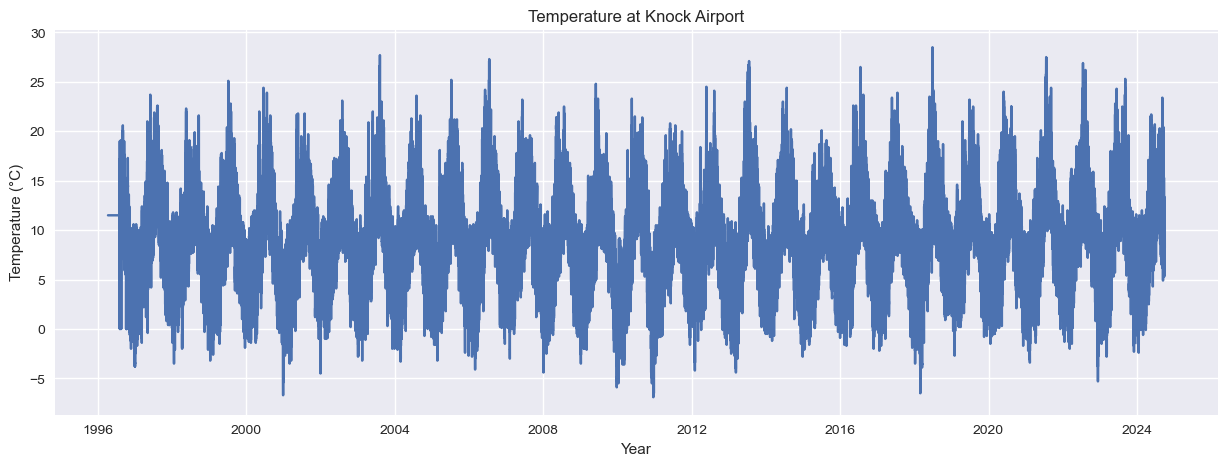

In [74]:
# Task 1: Plot the temperature.

fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(weather_df['temp'])

# Title and label the axis
plt.title('Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Display the plot
plt.show()

In [75]:
# Take a closer look. 
# Select the all the rows for the years 2010 and 2011
tens_weather_df = weather_df.loc['2010-01-01': '2012-01-01']

There was a [plot coloured by value](https://matplotlib.org/stable/gallery/color/color_by_yvalue.html#sphx-glr-gallery-color-color-by-yvalue-py) in the matplotlib documentation. I have replicated that code here to demonstrate

The upper and lower temperature values were chosen from the results of describe(). Any temperatures above 12°C (the 75th centile) will be coloured red and any temperature below 5.4°C (the 25th centile) will be green.

The use of AutoDateLocator and ConciseDateFormatter to format how the time and date are displayed on the x-axis were discussed in [assignment2-weather](https://github.com/IreneKilgannon/PFDA/blob/main/PFDA-assignments/assignment2-weather.ipynb).

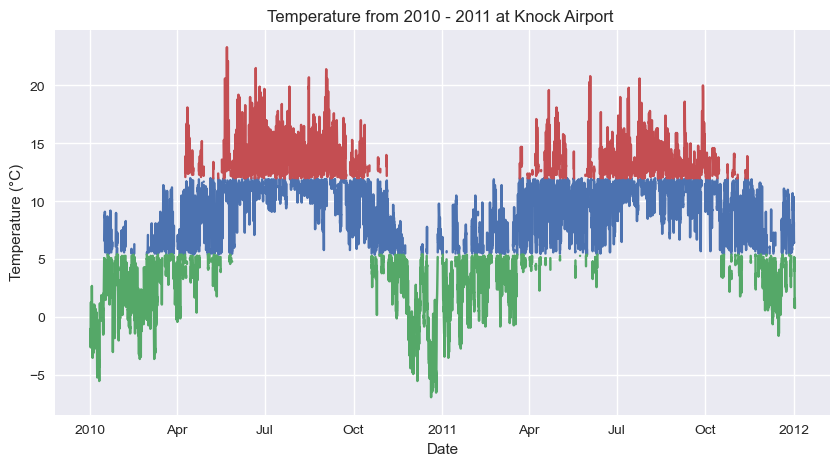

In [76]:
# Plot of the temperature from 2010 and 2011
fig, ax = plt.subplots(figsize = (10, 5))


# AutoDateLocator
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)

# ConciseDateFormatter 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
# Upper and lower limits chosen from the results of describe(). 
upper = 12
lower = 5.4

# Set the ranges
supper = np.ma.masked_where(tens_weather_df['temp'] < upper, tens_weather_df['temp'])
slower = np.ma.masked_where(tens_weather_df['temp'] > lower, tens_weather_df['temp'])
smiddle = np.ma.masked_where((tens_weather_df['temp'] < lower) | (tens_weather_df['temp'] > upper), tens_weather_df['temp'])

# Plot the data
plt.plot(tens_weather_df.index, smiddle, tens_weather_df.index, slower, tens_weather_df.index, supper)

# Label the x-axis, y-axis and title of plot
plt.title('Temperature from 2010 - 2011 at Knock Airport ')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Display the plot
plt.show()

## Task 2: Plot the Mean Temp Each Day

As there was no data recorded from 2pm on the 10th April 1996 to 8am on the 31st July 1996 the first row of data will be dropped as the missing data will affect the mean temperature.

In [77]:
# Drop the first row.
weather_df.drop('1996-04-10 14:00:00', inplace= True)

### Resampling the data

To adjust the frequency of the dates and times within data the [resample() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) can be used. The resample() function groups data within a specified time interval eg by month or day and then applies one or more functions to each group. It is similar to groupby() method that is used for categorical data. Resample() can only be used if the datetime column is the index. This [blog on resample()](https://www.datacamp.com/tutorial/pandas-resample-asfreq?) explains how to use resample. 

It will be used to calculate the mean of the daily temperatures for Task 2 by grouping the hourly data of the dataset into daily samples. 

In [78]:
# Use resample() to group weather_df to daily samples
daily = weather_df.resample('D')

In [79]:
# Get the daily mean temperature.
daily_mean_temp = daily['temp'].mean()
daily_mean_temp

date
1996-07-31    12.650000
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Freq: D, Name: temp, Length: 10290, dtype: float64

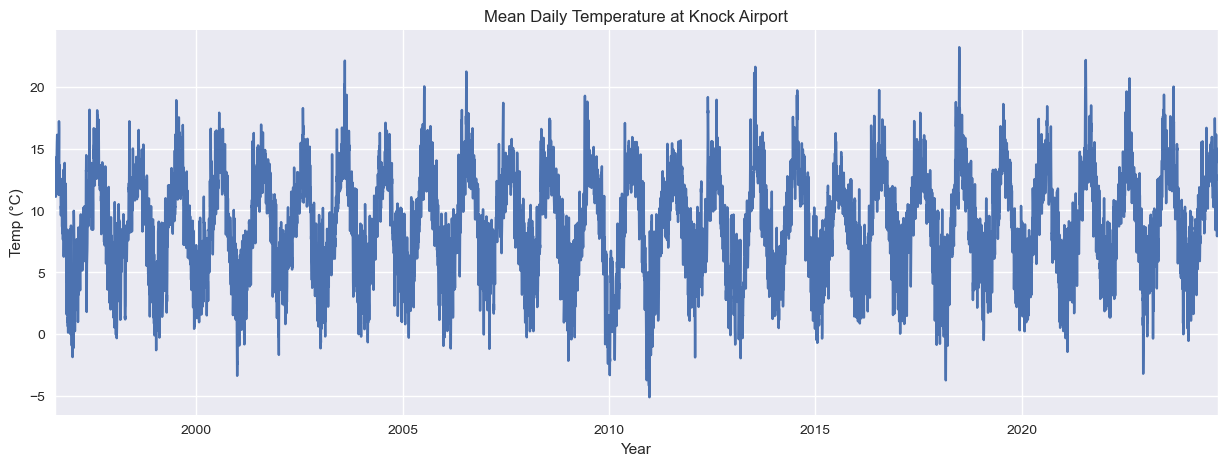

In [80]:
# Plot the daily mean temperature
fig, ax = plt.subplots(figsize = (15, 5))

# Plot the mean daily temperature
daily_mean_temp.plot()

# Set the title and label the axis
plt.xlabel('Year')
plt.ylabel('Temp (°C)')
plt.title('Mean Daily Temperature at Knock Airport')

# Display the plot
plt.show()

In [81]:
# Selecting the day from the index
index_day = weather_df.index.day

# Aggregating weather_df by day
temp_by_day = weather_df.groupby(index_day)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_day.head())

      min   max      mean
date                     
1    -6.5  23.3  8.674519
2    -4.9  24.8  8.680720
3    -3.5  24.1  8.575074
4    -4.4  24.2  8.484418
5    -2.8  26.6  8.661144


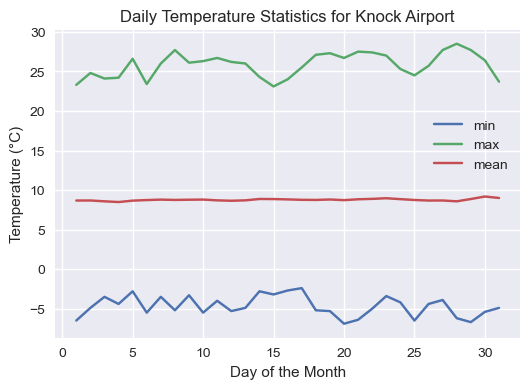

In [82]:
fig, ax = plt.subplots(figsize = (6,4))

# Plot the temperature by day of the month
plt.plot(temp_by_day)

labels = ['min', 'max', 'mean']

# Set the title and label the axis
plt.xlabel('Day of the Month')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Statistics for Knock Airport')
ax.legend(labels, bbox_to_anchor=(1, 0.75))

# Display the plot
plt.show()

## Task 3: Plot the Mean Temperature Each Month

In [83]:
# Use resample() to group weather_df to monthly samples
monthly = weather_df.resample('ME')

In [84]:
# Calculate the mean of the temperature column in monthly
monthly_mean_temp = monthly['temp'].mean()
monthly_mean_temp

date
1996-07-31    12.650000
1996-08-31    12.949798
1996-09-30    12.175104
1996-10-31     9.724929
1996-11-30     4.912117
                ...    
2024-06-30    11.278194
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     8.200000
Freq: ME, Name: temp, Length: 340, dtype: float64

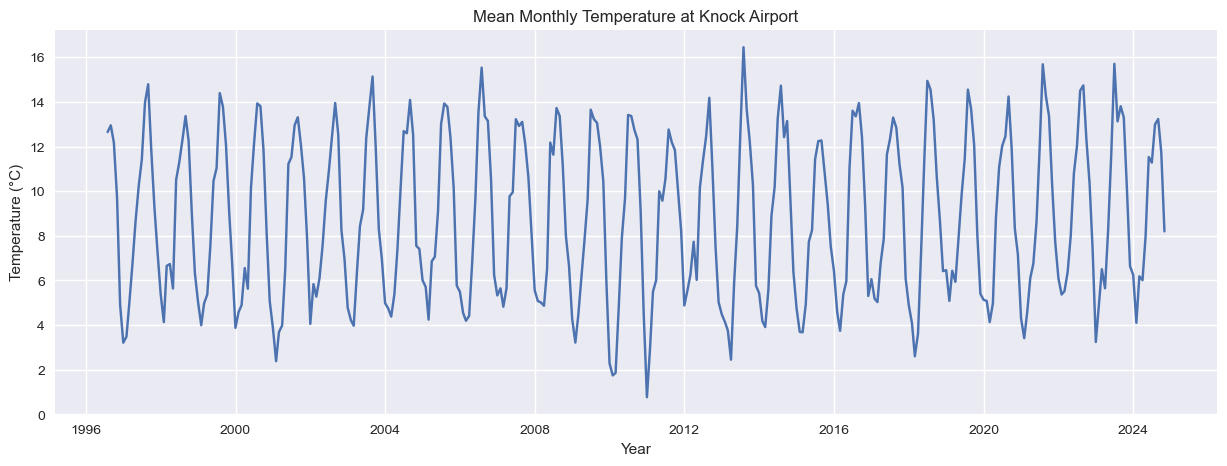

In [85]:
# Plot of the mean monthly temperatures.
fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(monthly_mean_temp)

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Monthly Temperature at Knock Airport')

plt.show()

The inspiration for the next plot came from a datacamp course on [visualizing time series data in python](https://app.datacamp.com/learn/courses/visualizing-time-series-data-in-python) that I completed to help me better understand how to plot time series data. 

In [86]:
# Select month from the index
index_month = weather_df.index.month

In [87]:
# Find the mean, min and max temp each month
temp_by_month = weather_df.groupby(index_month)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_month)

      min   max       mean
date                      
1    -5.5  12.6   4.348502
2    -5.2  14.6   4.686452
3    -6.5  18.4   5.625178
4    -2.0  21.0   7.518934
5    -0.4  24.5  10.212284
6     2.6  28.5  12.366806
7     6.2  27.5  13.650432
8     0.0  27.7  13.561395
9     3.8  25.3  12.092413
10   -0.7  19.6   9.308653
11   -4.4  14.8   6.488077
12   -6.9  13.2   4.760484


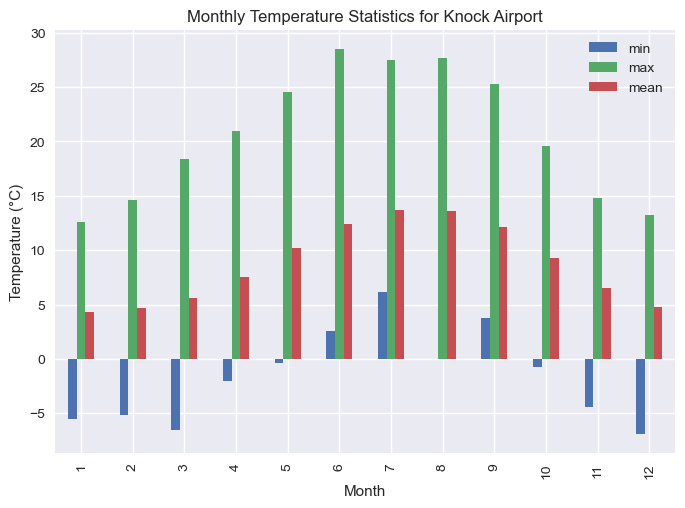

In [88]:
fig, ax = plt.subplots()

# Create a bar plot for the mean, max and min temperature for each month of the year
temp_by_month.plot(kind = 'bar', ax = ax)

# Labelling the plot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Statistics for Knock Airport')

# Display the plot
plt.show()

# 

In [89]:
index_year = weather_df.index.year

temp_by_year = weather_df.groupby(index_year)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_year.head())

      min   max      mean
date                     
1996 -3.8  20.6  8.599671
1997 -3.8  23.7  9.038664
1998 -3.5  22.3  8.615548
1999 -3.2  25.1  8.624281
2000 -6.7  24.4  8.399158


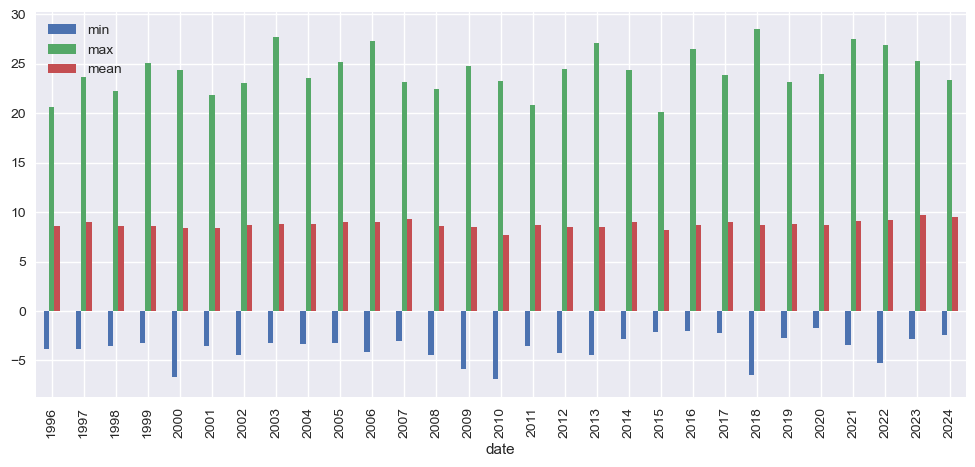

In [90]:
# Temperature statistics for each year
temp_by_year.plot(figsize = (12, 5), kind = 'bar')

plt.show()

## Task 4 Plot the Wind Speed

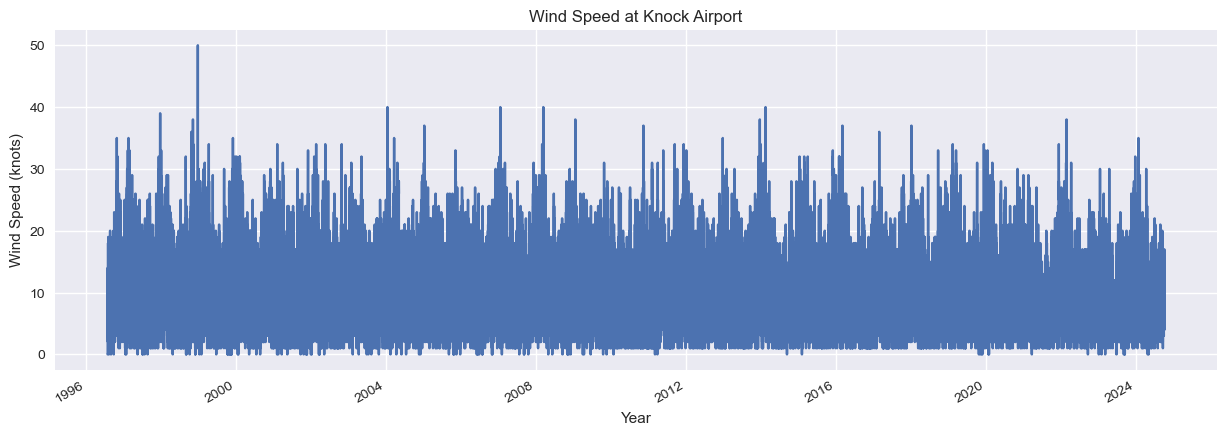

In [91]:
# Plot the wind speed
fig, ax = plt.subplots(figsize = (15, 5))

# Plotting the wind speed column
weather_df['wdsp'].plot()

# Labelling the plot
plt.xlabel('Year')
plt.ylabel('Wind Speed (knots)')
plt.title('Wind Speed at Knock Airport')

plt.show()

As there as so many data points it is difficult to read the plot. 

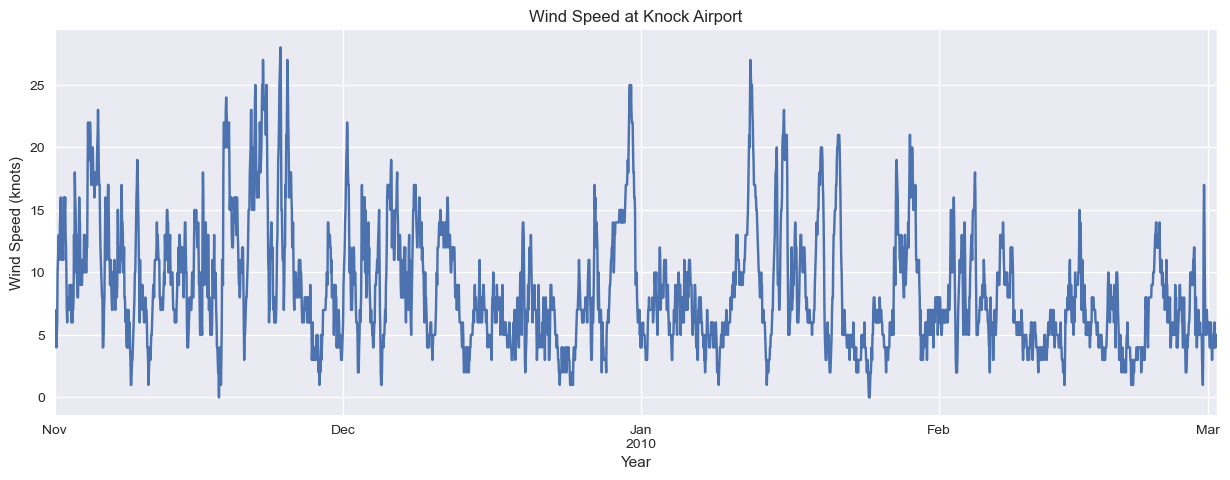

In [92]:
selected_weather_df = weather_df.loc['2009-11-01': '2010-03-01']

fig, ax = plt.subplots(figsize = (15, 5))

# Plot the wind speed for 
selected_weather_df['wdsp'].plot()

# Label the plot
plt.xlabel('Year')
plt.ylabel('Wind Speed (knots)')
plt.title('Wind Speed at Knock Airport')

plt.show()

These plots aren't particularly helpful to understand the wind speeds at Knock Airport. A more useful plot would be monthly statistics about the wind speeds such as the mean monthly wind speeds. This would give us information on the windiest and the least windiest months of the year. 

In [93]:
# What's the windiest month?
mean_wind_by_month = weather_df.groupby(index_month)['wdsp'].mean()

print(mean_wind_by_month)

date
1     10.473742
2     10.974979
3     10.118856
4      9.383730
5      9.187980
6      8.656994
7      8.170952
8      8.467532
9      8.830308
10     9.516281
11     9.583408
12    10.331941
Name: wdsp, dtype: float64


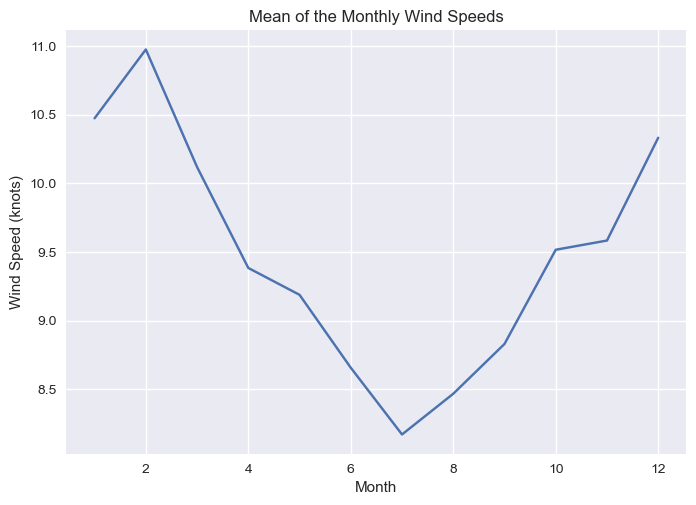

In [94]:
# Plot of the mean wind speed by month
mean_wind_by_month.plot()

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Mean of the Monthly Wind Speeds')
plt.show()

## Task 5 Plot the Rolling Wind Speed (over 24 hours).

The [rolling() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) used to get the rolling mean, also known as the moving average for one or more columns. It is applied to time-series data and allows calculations over consecutive time intervals depending on the frequency of the time index. It has a parameter of window, which is the size in the number of data points to be included in each calculation. The rolling mean is calculated for each window as it moves through the time-series data. By default it produces NaN for the first few entries. 

__Additional References__

https://sparkbyexamples.com/pandas/pandas-rolling-mean-average-sum/


In [95]:
# Rolling wind speed
rolling = weather_df['wdsp'].rolling(window='24h').mean()
rolling

date
1996-07-31 08:00:00    0.000000
1996-07-31 09:00:00    0.000000
1996-07-31 10:00:00    0.000000
1996-07-31 11:00:00    0.000000
1996-07-31 12:00:00    0.000000
                         ...   
2024-09-30 20:00:00    7.708333
2024-09-30 21:00:00    7.500000
2024-09-30 22:00:00    7.375000
2024-09-30 23:00:00    7.291667
2024-10-01 00:00:00    7.250000
Name: wdsp, Length: 246879, dtype: float64

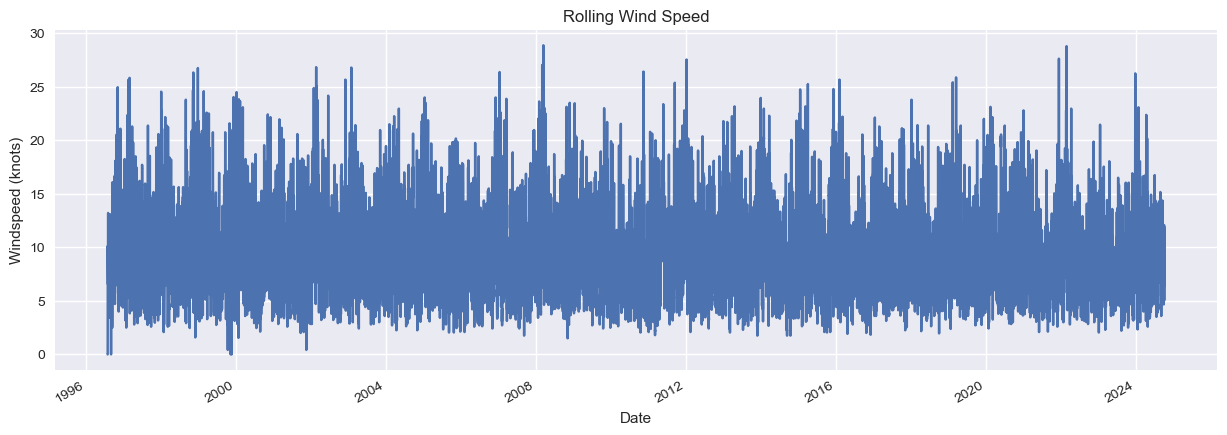

In [96]:
# Plot the data
rolling.plot(figsize= (15,5))

# Label the axis
plt.title('Rolling Wind Speed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')

plt.show()

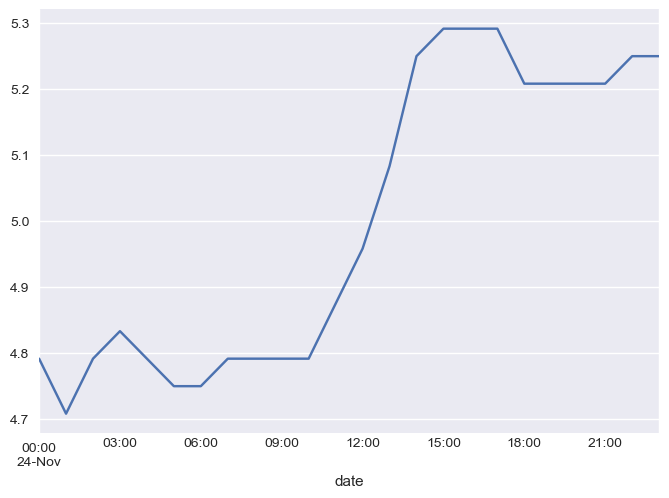

In [97]:
# Rolling mean for a 24h period

# plot 24 hours
day_in_nov  = rolling['2010-11-24']
day_in_nov.plot()

plt.show()

## Task 6 Plot the Max Wind Speed for Each Day

In [98]:
# Max wind speed for each day
max_daily_windspeed = daily['wdsp'].max()

max_daily_windspeed

date
1996-07-31     0
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
              ..
2024-09-27    15
2024-09-28     8
2024-09-29    17
2024-09-30    12
2024-10-01     6
Freq: D, Name: wdsp, Length: 10290, dtype: int32

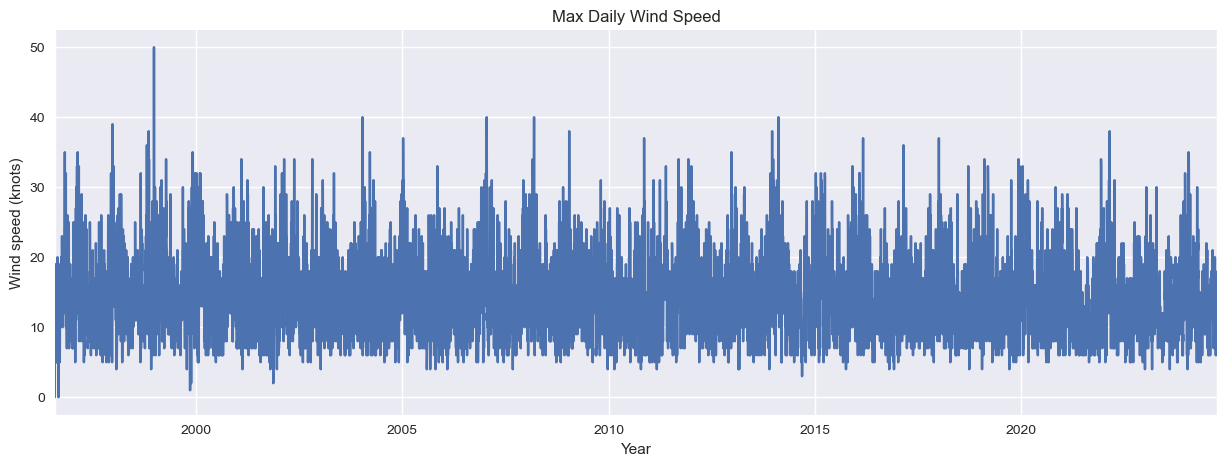

In [99]:
fig, ax = plt.subplots(figsize = (15, 5))

max_daily_windspeed.plot()

# Label the plot
plt.xlabel('Year')
plt.ylabel('Wind speed (knots)')
plt.title('Max Daily Wind Speed')

# Display the plot
plt.show()

## Task 7 Plot the Monthly Mean of the Daily Max Wind Speed.

In [100]:
max_daily_windspeed_df = pd.DataFrame(max_daily_windspeed)
max_daily_windspeed_df

,wdsp
date,
1996-07-31,0
1996-08-01,14
1996-08-02,13
1996-08-03,10
1996-08-04,18
...,...
2024-09-27,15
2024-09-28,8
2024-09-29,17


In [101]:
# Monthly mean of the daily max wind speeds

# Resample the daily max wind speeds df
mean_max_monthly = max_daily_windspeed_df.resample('ME')

# Get the Mean of the Max Monthly Windspeed
monthly_mean_max_wdsp = mean_max_monthly['wdsp'].mean()
monthly_mean_max_wdsp.head()

date
1996-07-31     0.000000
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
1996-11-30    17.133333
Freq: ME, Name: wdsp, dtype: float64

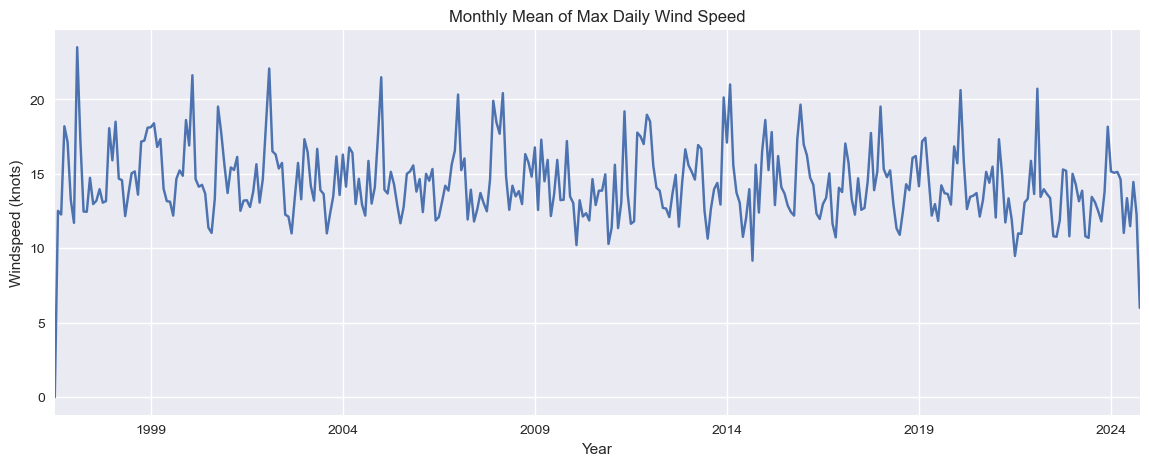

In [102]:
fig, ax = plt.subplots(figsize = (14, 5))
monthly_mean_max_wdsp.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Monthly Mean of Max Daily Wind Speed')
plt.show()

### End

***